# Json to Txt

## Test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import glob

with open('/content/drive/MyDrive/concerthall/S2-O1301M00001.json', 'r') as f:
    text = json.load(f)

In [ ]:
text

{'annotations': [{'box': [353, 233, 477, 419],
   'class': '07',
   'data ID': 'S2',
   'flags': 'not occluded, not truncated',
   'middle classification': '01'},
  {'box': [565, 625, 617, 720],
   'class': '41',
   'data ID': 'S2',
   'flags': 'not occluded, truncated',
   'middle classification': '07'}],
 'image': {'H_DPI': 96,
  'V_DPI': 96,
  'bit': '24',
  'copyrighter': '미디어그룹사람과숲(컨)',
  'date': '20200709',
  'filename': 'S2-O1301M00001.jpg',
  'location': '13',
  'path': 'S2-O1301M00001',
  'resolution': [1280, 720]}}

In [ ]:
# 총 몇개인지
len(text['annotations'])

2

In [ ]:
text['annotations'][0]

{'box': [353, 233, 477, 419],
 'class': '07',
 'data ID': 'S2',
 'flags': 'not occluded, not truncated',
 'middle classification': '01'}

In [ ]:
# Class 구분
classnum = text['annotations'][0]['class']
classnum

'07'

In [ ]:
type(classnum)

str

In [ ]:
# 좌표 모음
coordi = text['annotations'][0]['box']
coordi

[353, 233, 477, 419]

In [ ]:
filename = text['image']['filename'].split('.')[0]
filename

'S2-O1301M00001'

In [ ]:
# 사진 크기
imgwidth = text['image']['resolution'][0]  # 가로
imgheight = text['image']['resolution'][1]  # 세로

In [ ]:
# 좌표
x = coordi[0]
y = coordi[1]
w = coordi[2]
h = coordi[3]

In [ ]:
print(x,y,w,h)

353 233 477 419


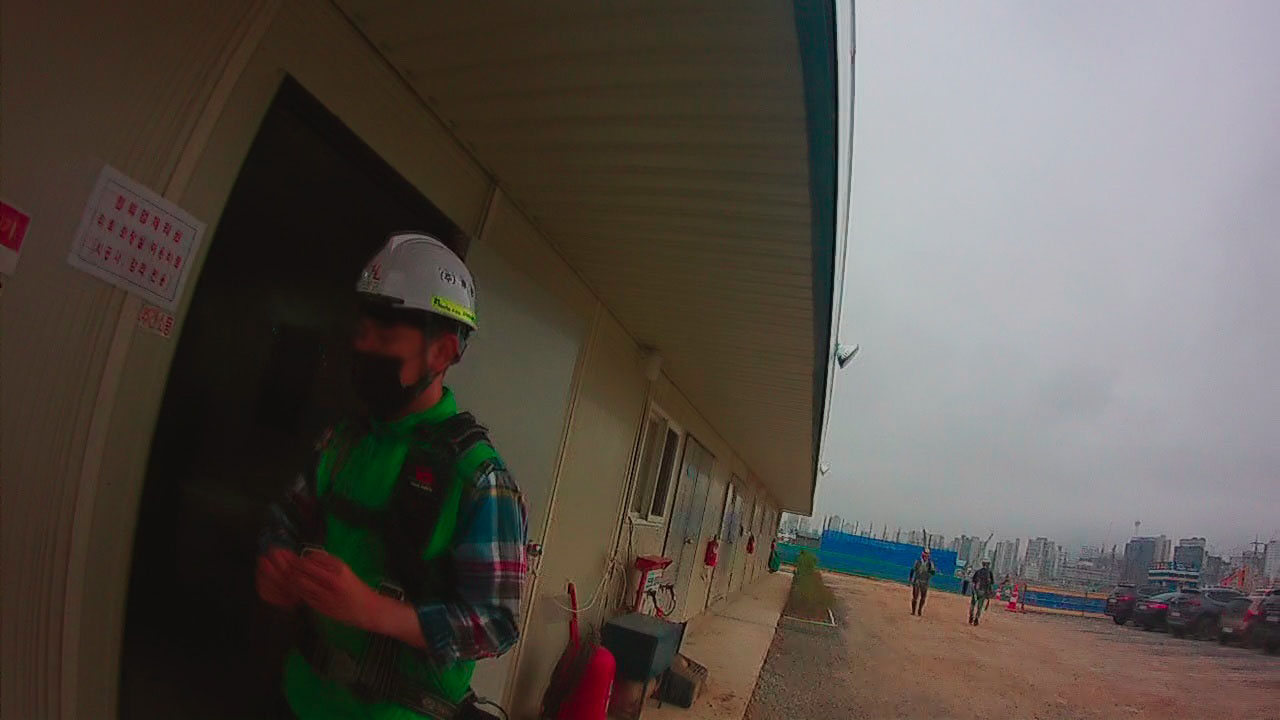

In [ ]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/최종프로젝트/자료/dataset/[원천]2.공연장_부산_오페라_하우스_신축공사/S2-O1301M00001.jpg')
img

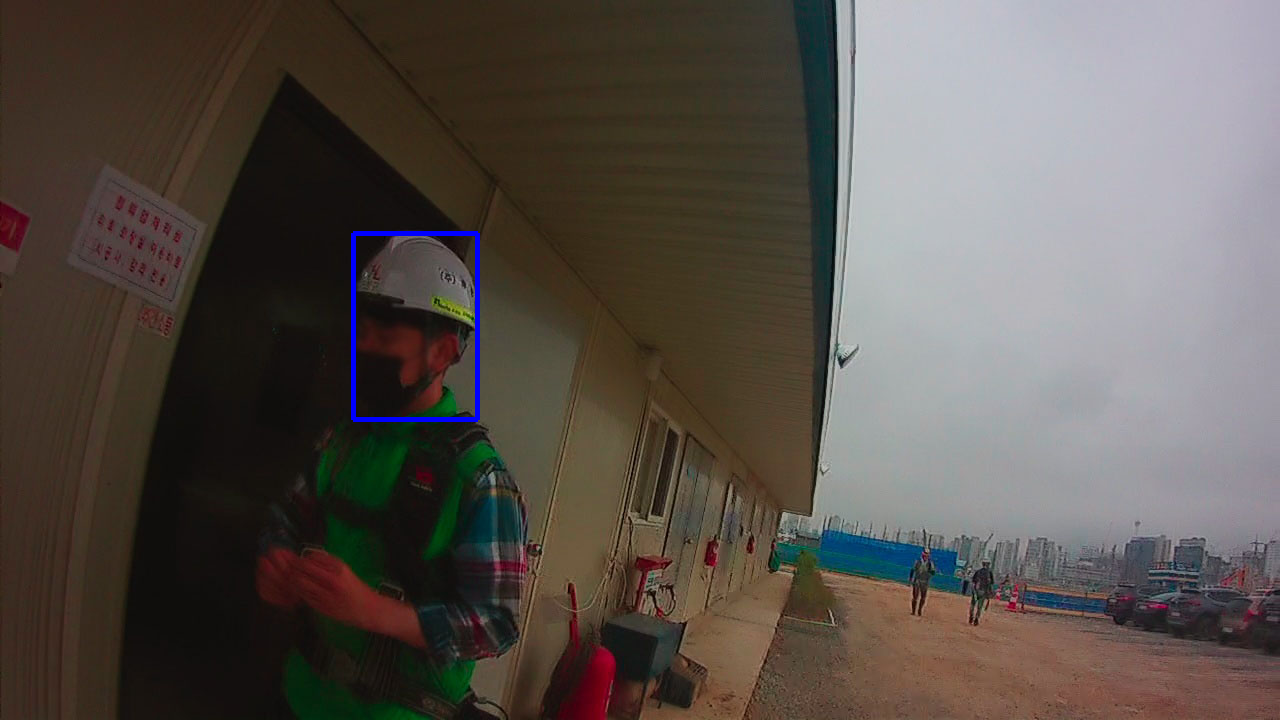

In [ ]:
from PIL import ImageDraw
draw = ImageDraw.Draw(img)
draw.line([(x,y), (x, h), (w, h), (w, y), (x,y)], fill="Blue", width=5)

img

In [ ]:
# 좌표를 상대좌표로 수정
zerox = round((x / imgwidth),6)
zeroy = round((y / imgheight),6)
zerow = round((w / imgwidth),6)
zeroh = round((h / imgheight),6)

In [ ]:
print(zerox, zeroy, zerow, zeroh)

0.275781 0.323611 0.372656 0.581944


In [ ]:
# json 파일에서 필요한 class만 불러와서 txt로 저장해주는 함수

def darknettxt(text):
    filename = text['image']['filename'].split('.')[0]  # 파일 이름
    imgwidth = text['image']['resolution'][0]  # 가로
    imgheight = text['image']['resolution'][1]  # 세로
    for i in range(len(text['annotations'])):   
        classnum = text['annotations'][i]['class']  # class 이름
        if classnum == '07':                        # class가 07일때 (안전모 착용)
            yoloclassnum = 0
            coordi = text['annotations'][i]['box']  # coodi = 좌표계 모음
            zerox = round((coordi[0] / imgwidth),6)   # 상대좌표로 수정
            zeroy = round((coordi[1] / imgheight),6)
            zerow = round((coordi[2] / imgwidth),6)
            zeroh = round((coordi[3] / imgheight),6)
            darknet = f'{yoloclassnum} {zerox} {zeroy} {zerow} {zeroh}'
            if i == 0:
                f = open(f"/content/drive/MyDrive/concerthall_txt/{filename}.txt", "w")
                f.write(f'{darknet}\n')
                f.close()
            else:
                f = open(f"/content/drive/MyDrive/concerthall_txt/{filename}.txt", "a")
                f.write(f'{darknet}\n')
                f.close()
        elif classnum == '08':  # class가 08일때 (안전모 미착용)
            yoloclassnum = 1
            coordi = text['annotations'][i]['box']  # coodi = 좌표계 모음
            zerox = round((coordi[0] / imgwidth),6)   # 상대좌표로 수정
            zeroy = round((coordi[1] / imgheight),6)
            zerow = round((coordi[2] / imgwidth),6)
            zeroh = round((coordi[3] / imgheight),6)
            darknet = f'{yoloclassnum} {zerox} {zeroy} {zerow} {zeroh}'
            if i == 0:
                f = open(f"/content/drive/MyDrive/concerthall_txt/{filename}.txt", "w")
                f.write(f'{darknet}\n')
                f.close()
            else:
                f = open(f"/content/drive/MyDrive/concerthall_txt/{filename}.txt", "a")
                f.write(f'{darknet}\n')
                f.close()
        else:
            pass

## 함수 정의

In [ ]:
# json파일을 입력하면(text) 파일이름.txt 파일을 만들어 주는 함수

classes = {'01':0, '05':1, '07':2} # 0: 안전벨트 착용, 1: 안전화 착용, 2: 안전모 착용

def darknettxt(text):
    filename = text['image']['filename'].split('.')[0]  # 파일 이름
    imgwidth = text['image']['resolution'][0]  # 가로
    imgheight = text['image']['resolution'][1]  # 세로
    text = text
    for i in range(len(text['annotations'])):   
        classnum = text['annotations'][i]['class']  # class 이름
        if classnum in ('01', '05', '07'):                     
            yoloclass(text, classes[classnum], i, filename, imgwidth, imgheight)
        else:
            pass

In [ ]:
# yolo에서 class가 k일 때, yolo의 class와 상대좌표를 입력해서 txt로 바꿔주는 함수

def yoloclass(text, k, i, filename, imgwidth, imgheight):
    yoloclassnum = k
    coordi = text['annotations'][i]['box']  # coodi = 좌표계 모음
    if coordi[0] == 0:
        coordi[0] = 1
    if coordi[1] == 0:
        coordi[1] = 1
    zerox = round((coordi[0] / imgwidth),6)   # 상대좌표로 수정
    zeroy = round((coordi[1] / imgheight),6)
    zerow = round((coordi[2] / imgwidth),6)
    zeroh = round((coordi[3] / imgheight),6)
    darknet = f'{yoloclassnum} {zerox} {zeroy} {zerow} {zeroh}'
    if i == 0:
        f = open(f"/content/drive/MyDrive/concerthall_txt/{filename}.txt", "w")     # txt 파일 저장할 경로
        f.write(f'{darknet}\n')
        f.close()
    else:
        f = open(f"/content/drive/MyDrive/concerthall_txt/{filename}.txt", "a")     # txt 파일 저장할 경로
        f.write(f'{darknet}\n')
        f.close()

## 폴더 glob test

In [ ]:
from glob import glob

jsonList = glob("/content/drive/MyDrive/concerthall/*.json")       # json 파일 있는 폴더에서 glob

In [ ]:
jsonList[:5]

['/content/drive/MyDrive/concerthall/S2-O1301M04118.json',
 '/content/drive/MyDrive/concerthall/S2-O1301M04119.json',
 '/content/drive/MyDrive/concerthall/S2-O1301M04121.json',
 '/content/drive/MyDrive/concerthall/S2-O1301M04123.json',
 '/content/drive/MyDrive/concerthall/S2-O1301M04124.json']

In [ ]:
import json

for jsonfile in jsonList:
    with open(jsonfile, 'r', encoding='UTF8') as f:
        json_data = json.load(f)
        text = json_data
    darknettxt(text)

In [ ]:
import shutil

In [ ]:
txtlist = glob("/content/drive/MyDrive/concerthall_txt/*.txt")
len(txtlist)

3057

In [ ]:
imgname = txtlist[0].split('/')[-1].split('.')[0]
imgname

'S2-O1301M04118'

In [ ]:
jpgname = f"{imgname}.jpg"
jpgname

'S2-O1301M04118.jpg'

In [ ]:
import os

for txt in txtlist:
    imgname = txt.split('/')[-1].split('.')[0]
    jpgname = f"{imgname}.jpg"
    before= os.path.join(f'/content/drive/MyDrive/최종프로젝트/자료/dataset/[원천]2.공연장_부산_오페라_하우스_신축공사/{jpgname}')     # 원천 이미지 파일 있는 폴더
    target= os.path.join(f'/content/drive/MyDrive/concerthall_txt/{jpgname}')   # 사진들 복사할 폴더 (txt있는 파일 쓰는게 한번에 할수 있어서 좋음)
    try:
        shutil.copyfile(before, target)
    except:
        print('error==>')